## 어제 코드 분석

In [1]:
import numpy as np
# from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


In [9]:
#===============================#
## First-visit Monte Carlo
#===============================#

# parameters
gamma = 0.6 # discounting rate
rewardSize = -1
gridSize = 4
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]  # up, down, left, right
numIterations = 10000

In [10]:
# initialization
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)} #dictionary with keys and values 
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}  #dictionary with keys and values 
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [11]:
V

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [12]:
returns

{(0, 0): [],
 (0, 1): [],
 (0, 2): [],
 (0, 3): [],
 (1, 0): [],
 (1, 1): [],
 (1, 2): [],
 (1, 3): [],
 (2, 0): [],
 (2, 1): [],
 (2, 2): [],
 (2, 3): [],
 (3, 0): [],
 (3, 1): [],
 (3, 2): [],
 (3, 3): []}

In [13]:
returns == deltas

True

In [14]:
states

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [1, 0],
 [1, 1],
 [1, 2],
 [1, 3],
 [2, 0],
 [2, 1],
 [2, 2],
 [2, 3],
 [3, 0],
 [3, 1],
 [3, 2],
 [3, 3]]

In [15]:
# utils
def generateEpisode():
    initState = random.choice(states[1:-1])
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)
        finalState = np.array(initState)+np.array(action)
        if -1 in list(finalState) or gridSize in list(finalState):
            finalState = initState
        episode.append([list(initState), action, rewardSize, list(finalState)])
        initState = finalState

In [30]:
episode = generateEpisode()
episode

[[[3, 1], [-1, 0], -1, [2, 1]],
 [[2, 1], [0, -1], -1, [2, 0]],
 [[2, 0], [0, 1], -1, [2, 1]],
 [[2, 1], [0, 1], -1, [2, 2]],
 [[2, 2], [0, 1], -1, [2, 3]],
 [[2, 3], [-1, 0], -1, [1, 3]],
 [[1, 3], [0, 1], -1, [1, 3]],
 [[1, 3], [0, 1], -1, [1, 3]],
 [[1, 3], [0, -1], -1, [1, 2]],
 [[1, 2], [1, 0], -1, [2, 2]],
 [[2, 2], [0, -1], -1, [2, 1]],
 [[2, 1], [0, 1], -1, [2, 2]],
 [[2, 2], [1, 0], -1, [3, 2]],
 [[3, 2], [1, 0], -1, [3, 2]],
 [[3, 2], [0, 1], -1, [3, 3]]]

In [31]:
G = 0

In [32]:
for i, step in enumerate(episode[::-1]):
    print(i, step)

0 [[3, 2], [0, 1], -1, [3, 3]]
1 [[3, 2], [1, 0], -1, [3, 2]]
2 [[2, 2], [1, 0], -1, [3, 2]]
3 [[2, 1], [0, 1], -1, [2, 2]]
4 [[2, 2], [0, -1], -1, [2, 1]]
5 [[1, 2], [1, 0], -1, [2, 2]]
6 [[1, 3], [0, -1], -1, [1, 2]]
7 [[1, 3], [0, 1], -1, [1, 3]]
8 [[1, 3], [0, 1], -1, [1, 3]]
9 [[2, 3], [-1, 0], -1, [1, 3]]
10 [[2, 2], [0, 1], -1, [2, 3]]
11 [[2, 1], [0, 1], -1, [2, 2]]
12 [[2, 0], [0, 1], -1, [2, 1]]
13 [[2, 1], [0, -1], -1, [2, 0]]
14 [[3, 1], [-1, 0], -1, [2, 1]]


In [33]:
# parameters
gamma = 0.6 # discounting rate
rewardSize = -1
gridSize = 4
terminationStates = [[0,0], [gridSize-1, gridSize-1]]

i = 0
step = [[3, 2], [0, 1], -1, [3, 3]]

G = gamma * G + step[2]
print(G)

-1.0


In [42]:
print('root :', [x[0] for x in episode[::-1][len(episode)-i:]])
print('these step :', step[0])
print('step[0] not in root ? :', 
      step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]])

root : []
these step : [3, 2]
step[0] not in root ? : True


In [47]:
idx = tuple(step[0])
print(idx)

(3, 2)


In [50]:
returns[idx].append(G)
print(idx, ":", returns[idx])

(3, 2) : [-1.0]


## TalkOn Sermina

In [82]:
import random

class GridWorld():
    def __init__(self, init_pt=(0,0), size=4, end_pts=[(3,3)]):
        self.x=init_pt[0]
        self.y=init_pt[1]
        self.size=size
        assert len(end_pts) > 0, 'end_pt is required!!'
        self.end_pts = end_pts
        self.history = []
    
    def move_right(self):
        self.y += 1  
        if self.y > self.size - 1:
            self.y = self.size - 1

    def move_left(self):
        self.y -= 1
        if self.y < 0:
            self.y = 0

    def move_up(self):
        self.x -= 1
        if self.x < 0:
            self.x = 0

    def move_down(self):
        self.x += 1
        if self.x > self.size - 1:
            self.x = self.size - 1

    def move_random(self):
        coin = random.randint(0, self.size - 1)
        if coin==0:
            self.move_right()
        elif coin==1:
            self.move_left()
        elif coin==2:
            self.move_up()
        else:
            self.move_down()

        self.history.append((self.x, self.y))

    def move_random_until_end(self):
        while True:
            self.move_random()

            if (self.x, self.y) in self.end_pts:
                history = self.history
                self.initialize()
                return history

    def initialize(self):
        self.x = 0
        self.y = 0
        self.history = []

In [86]:
# MonteCarlo
data = np.zeros((4,4))
env = GridWorld(init_pt=, )

for k in range(10000):
    history = env.move_random_until_end()
    cum_reward = 0
    
    for position in history[::-1]:
        x, y = position
        data[x, y] = 0.999*data[x][y] + 0.001*cum_reward
        cum_reward -= 1
        
for row in data:
    print(row)

In [63]:
#===============================#
## First-visit Monte Carlo
#===============================#

# parameters
gamma = 0.6 # discounting rate
rewardSize = -1
gridSize = 4
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]  # up, down, left, right
numIterations = 10000

# initialization
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)} #dictionary with keys and values 
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}  #dictionary with keys and values 
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

# utils
def generateEpisode():
    initState = random.choice(states[1:-1])
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)
        finalState = np.array(initState)+np.array(action)
        if -1 in list(finalState) or gridSize in list(finalState):
            finalState = initState
        episode.append([list(initState), action, rewardSize, list(finalState)])
        initState = finalState

for it in range(numIterations):  #상태바 출력
    episode = generateEpisode()
    G = 0
    for i, step in enumerate(episode[::-1]):
        G = gamma*G + step[2]
        if step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]]:
            idx = (step[0][0], step[0][1])
            returns[idx].append(G)
            newValue = np.average(returns[idx])
            deltas[idx[0], idx[1]].append(np.abs(V[idx[0], idx[1]]-newValue))
            V[idx[0], idx[1]] = newValue

In [64]:
V

array([[ 0.        , -1.64232621, -2.21195304, -2.36896102],
       [-1.63132908, -2.11110327, -2.28107273, -2.20660007],
       [-2.21156773, -2.28402607, -2.10477695, -1.63555545],
       [-2.37256685, -2.21078312, -1.62941446,  0.        ]])

# DQN

In [90]:
import gym
import numpy as np
import random
import tensorflow as tf

#====== 환경 로딩 =======#
env = gym.make('Taxi-v2')
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [92]:
env.observation_space.n, env.action_space.n

(500, 6)

In [94]:
#====== 신경망 구현 =======#
tf.reset_default_graph()

# 행동을 선택하는데 사용되는 신경망의 피드-포워드 부분을 구축한다.
inputs = tf.placeholder(shape=[1, env.observation_space.n], 
                        dtype=tf.float32)  # 1*500 matrix
weights = tf.Variable(tf.random_uniform(
    [env.observation_space.n,env.action_space.n], 0, 0.01))  # 500*6 matrix
q_out = tf.matmul(inputs, weights)  # 1*6 matrix
predict = tf.argmax(q_out,1)

In [95]:
# 목표 Q값(ext_q)과 예측 Q값(q_out)의 제곱합을 구함으로써 비용을 얻게 된다.
next_q = tf.placeholder(shape=[1,env.action_space.n], # 1*500
                        dtype=tf.float32)
loss = tf.reduce_sum(tf.square(next_q - q_out))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
loss_update = trainer.minimize(loss)

In [102]:
state = env.reset()
state

261

In [104]:
np.identity(500)[state:state+1] # 임의의 한 점

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

(array([ 9838., 10057., 10017.,  9949., 10089.,  9998., 10110.,  9904.,
         9950., 10088.]),
 array([1.30747080e-05, 1.00011278e-01, 2.00009481e-01, 3.00007685e-01,
        4.00005888e-01, 5.00004091e-01, 6.00002295e-01, 7.00000498e-01,
        7.99998701e-01, 8.99996905e-01, 9.99995108e-01]),
 <a list of 10 Patch objects>)

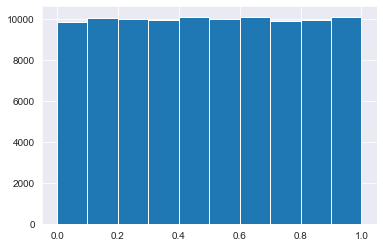

In [126]:
plt.hist(np.random.rand(100000))

In [154]:
np.unique(res)

array([0, 1, 2, 3, 4, 5])

(array([1715.,    0., 1724.,    0., 1681.,    0., 1646.,    0., 1609.,
        1625.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

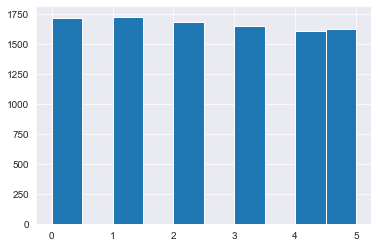

In [153]:
res = []
for i in range(10000):
    res.append(env.action_space.sample())
plt.hist(res)

In [ ]:
#====== 신경망 학습하기 =======#
init = tf.global_variables_initializer()

# 학습 관련 파라미터를 설정한다.
gamma = 0.7
epsilon = 0.2
epsilon_decay = .99
episodes = 100

total_epochs = 0
total_rewards = 0

with tf.Session() as sess:
    sess.run(init)
    for episode in range(episodes):
        #환경을 리셋하고 첫번째 새로운 관측값을 얻는다.
        state = env.reset()
        rewards_this_episode = 0
        epochs = 0

        done = False
        
        # q-network 
        while not done:
            #Q-네트워크로부터 (e의 확률로 랜덤한 액션과 함께) 그리디하게 액션을 선택한다.
            action, q = sess.run(
                [predict,q_out], 
                feed_dict={
                    inputs:np.identity(env.observation_space.n)[state:state + 1]
                })
            if np.random.rand(1) < epsilon: # 균등분포
                action[0] = env.action_space.sample()

            #환경으로부터 새로운 상태와 보상을 얻는다.                
            next_state, reward, done, info = env.step(action[0])
            #새로운 상태를 네트워크에 피드해줌으로써 Q’값을 구한다.
            curr_q = sess.run(q_out, feed_dict = {inputs:np.identity(env.observation_space.n)[next_state:next_state+1]})
            #maxQ'값을 구하고 선택된 행동에 대한 타겟 값을 설정한다.
            max_next_q = np.max(curr_q)
            target_q = q
            target_q[0, action[0]] = reward + gamma * max_next_q

            #타겟과 예측된 Q값을 이용하여 네트워크를 학습시킨다.
            info, new_weights = sess.run([loss_update, weights], feed_dict={inputs:np.identity(env.observation_space.n)[state:state+1], next_q:target_q})
            rewards_this_episode += reward
            state = next_state
            epochs += 1
        #모델을 학습해 나감에 따라 랜덤 액션의 가능성을 줄여간다.    
        epsilon = epsilon * epsilon_decay
        
        total_epochs += epochs
        total_rewards += rewards_this_episode
        
print ("Percent of succesful episodes: " + str(total_rewards/episodes))

## 코드 분석

### GridWorld

In [158]:
"""
gridworld
https://github.com/awjuliani/DeepRL-Agents/blob/master/gridworld.py
@author: Administrator
"""

import numpy as np
import random
import itertools
import scipy.misc
import matplotlib.pyplot as plt

In [159]:
class gameOb(): # Game Object
    def __init__(self,coordinates,size,intensity,channel,reward,name):
        self.x = coordinates[0]
        self.y = coordinates[1]
        self.size = size
        self.intensity = intensity
        self.channel = channel
        self.reward = reward
        self.name = name

- gameEnv

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:94: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:95: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:96: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


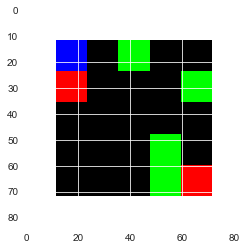

In [215]:
partial = False
size = 5
env = gameEnv(partial=partial, size=size)

In [223]:
for ob in env.objects:
    print(ob.name, (ob.x, ob.y))

hero (0, 0)
goal (4, 1)
fire (4, 4)
goal (3, 4)
fire (0, 1)
goal (3, 3)
goal (2, 0)


In [216]:
iterables = [range(5), range(5)]
for t in itertools.product(*iterables):
    print(t)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(4, 0)
(4, 1)
(4, 2)
(4, 3)
(4, 4)


In [224]:
a = np.ones([5+2,
             5+2,
             3])
a[1:-1,1:-1,:] = 0
a, a.shape

(array([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [1., 1., 1.]],
 
        [[1., 1.

In [225]:
a

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]

In [226]:
for item in env.objects:
    print(item.name, '\n\n')
    a[item.y+1:item.y+item.size+1,
      item.x+1:item.x+item.size+1,
      item.channel] = item.intensity

hero 


goal 


fire 


goal 


fire 


goal 


goal 




In [248]:
scipy.__version__

'1.2.1'

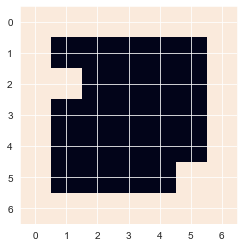

In [259]:
plt.imshow(a[:,:,0])
plt.show()

In [303]:
a[:,:,0]

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

In [302]:
from PIL import Image
print(scipy.misc.imresize(a[:,:,0], [10,10,1], interp='nearest'))
np.array(Image.fromarray(a[:,:,0], mode=None).resize((10, 10))) * 255

[[255 255 255 255 255 255 255 255 255 255]
 [255   0   0   0   0   0   0   0   0 255]
 [255   0   0   0   0   0   0   0   0 255]
 [255 255 255   0   0   0   0   0   0 255]
 [255   0   0   0   0   0   0   0   0 255]
 [255   0   0   0   0   0   0   0   0 255]
 [255   0   0   0   0   0   0   0   0 255]
 [255   0   0   0   0   0   0 255 255 255]
 [255   0   0   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]]


C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


array([[255., 255., 255., 255., 255., 255., 255., 255., 255., 255.],
       [255.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 255.],
       [255.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 255.],
       [255., 255., 255.,   0.,   0.,   0.,   0.,   0.,   0., 255.],
       [255.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 255.],
       [255.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 255.],
       [255.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 255.],
       [255.,   0.,   0.,   0.,   0.,   0.,   0., 255., 255., 255.],
       [255.,   0.,   0.,   0.,   0.,   0.,   0., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 255., 255., 255.]],
      dtype=float32)

In [304]:
b = np.array(Image.fromarray(a[:,:,0], mode=None).resize((84, 84))) * 255
c = np.array(Image.fromarray(a[:,:,1], mode=None).resize((84, 84))) * 255
d = np.array(Image.fromarray(a[:,:,2], mode=None).resize((84, 84))) * 255

In [308]:
np.stack([b, c, d], axis=2).shape

(84, 84, 3)

In [161]:
class gameEnv():
    def __init__(self,partial,size):
        self.sizeX = size
        self.sizeY = size
        self.actions = 4
        self.objects = [] # object를 저장하는 리스트
        self.partial = partial
        # self.renderEnv()에서 반환된 RGB 이미지를 반환
        a = self.reset()
        plt.imshow(a,interpolation="nearest")
        
    def reset(self):
        self.objects = []
        """
        -----gameob parameter----
        coordinates
        size = 1
        intensity = 1
        channel = 0, 1, 2; hero, hole, bug 구분 채널
        reward = None. 1, -1; hole에 가면 -1, bug에 가면 +1
        name = 'hero', 'goal', 'fire'
        """
        # self.newPosition() : 
        # 1. 좌표평면 상에 다른 object가 있는지 탐색
        # 2. 존재한다면 그 위치를 제외한 임의의 위치에 obejct를 위치시킴
        hero = gameOb(self.newPosition(),1,1,2,None,'hero')
        self.objects.append(hero)
        bug = gameOb(self.newPosition(),1,1,1,1,'goal')
        self.objects.append(bug)
        hole = gameOb(self.newPosition(),1,1,0,-1,'fire')
        self.objects.append(hole)
        bug2 = gameOb(self.newPosition(),1,1,1,1,'goal')
        self.objects.append(bug2)
        hole2 = gameOb(self.newPosition(),1,1,0,-1,'fire')
        self.objects.append(hole2)
        bug3 = gameOb(self.newPosition(),1,1,1,1,'goal')
        self.objects.append(bug3)
        bug4 = gameOb(self.newPosition(),1,1,1,1,'goal')
        self.objects.append(bug4)
        # self.renderEnv() :
        # 각각 hero, goal, fire는 다른 channel값을 가진다.
        # 3개 >> RGB로 표현할 계획
        # 이를 channel별로 (7,7,3) 배열로 뿌려주고
        # a[:,:,channel]을 (84,84)로 resize한 후에
        # 이를 합친 배열을 return한다.
        # 만일 partial=True 옵션을 부여하면, hero를 기준으로 3*3을 84*84로 반환
        state = self.renderEnv()
        self.state = state
        return state

    def moveChar(self,direction):
        # 0 - up, 1 - down, 2 - left, 3 - right
        hero = self.objects[0]
        heroX = hero.x
        heroY = hero.y
        penalize = 0.
        if direction == 0 and hero.y >= 1:
            hero.y -= 1
        if direction == 1 and hero.y <= self.sizeY-2:
            hero.y += 1
        if direction == 2 and hero.x >= 1:
            hero.x -= 1
        if direction == 3 and hero.x <= self.sizeX-2:
            hero.x += 1     
        if hero.x == heroX and hero.y == heroY:
            penalize = 0.0
        self.objects[0] = hero
        return penalize
    
    def newPosition(self):
        # 좌표 생성 ---------------------------------------------------
        iterables = [ range(self.sizeX), range(self.sizeY) ]
        points = [] # size * size의 total 좌표 저장
        for t in itertools.product(*iterables):
            points.append(t)
        # object 현재 위치 탐색 ----------------------------------------
        currentPositions = []
        for objectA in self.objects:
            if (objectA.x, objectA.y) not in currentPositions: # object의 현재 위치 지정
                currentPositions.append(
                    (objectA.x,objectA.y)
                ) 
        # 좌표평면 상에서 object가 위치하고 있는 좌표 제거 -------------
        for pos in currentPositions:
            points.remove(pos)
        # randomize하게 이미 존재하는 object가 위치하는 자리를 제외한
        # position을 반환 ----------------------------------------------
        location = np.random.choice(range(len(points)),replace=False)
        return points[location]

    def checkGoal(self):
        others = []
        for obj in self.objects:
            if obj.name == 'hero':
                hero = obj
            else:
                others.append(obj)
        ended = False
        for other in others:
            if hero.x == other.x and hero.y == other.y:
                self.objects.remove(other)
                if other.reward == 1:
                    self.objects.append(gameOb(self.newPosition(),1,1,1,1,'goal'))
                else: 
                    self.objects.append(gameOb(self.newPosition(),1,1,0,-1,'fire'))
                return other.reward,False
        if ended == False:
            return 0.0,False

    def renderEnv(self):
        #a = np.zeros([self.sizeY,self.sizeX,3])
        # (7,7,3)으로 render, channel수는 3
        # 7,7을 channel로 뿌려줌 --------------------------
        a = np.ones([self.sizeY+2,self.sizeX+2,3])
        a[1:-1,1:-1,:] = 0
        hero = None
        for item in self.objects:
            a[item.y+1:item.y+item.size+1,
              item.x+1:item.x+item.size+1,
              item.channel] = item.intensity
            if item.name == 'hero':
                hero = item
        if self.partial == True:
            a = a[hero.y:hero.y+3,hero.x:hero.x+3,:]
        # Depreciation scipy 1.3.0
#         b = scipy.misc.imresize(a[:,:,0],[84,84,1],interp='nearest')
#         c = scipy.misc.imresize(a[:,:,1],[84,84,1],interp='nearest')
#         d = scipy.misc.imresize(a[:,:,2],[84,84,1],interp='nearest')
        b = np.array(Image.fromarray(a[:,:,0], mode=None).resize((84, 84))) * 255
        c = np.array(Image.fromarray(a[:,:,1], mode=None).resize((84, 84))) * 255
        d = np.array(Image.fromarray(a[:,:,2], mode=None).resize((84, 84))) * 255
        # hero, goal, fire를 RGB 새게 채널로 만들어 합쳐서 리던 -------
        a = np.stack([b,c,d],axis=2)
        return a

    def step(self,action):
        penalty = self.moveChar(action)
        reward,done = self.checkGoal()
        state = self.renderEnv()
        if reward == None:
            print(done)
            print(reward)
            print(penalty)
            return state,(reward+penalty),done
        else:
            return state,(reward+penalty),done

In [309]:
"""
Double Dueling DQN: Gridworld
http://localhost:8888/notebooks/Desktop/%EA%B0%95%EC%9D%98%EA%B4%80%EB%A0%A8/Chap6.Double-Dueling-DQN.ipynb
강화학습 첫걸음
"""
"""
에이전트는 파란색 사각형을 위, 아래, 왼쪽, 오른쪽으로 이동시킨다. 
목표는 빨간색 사각형 (-1의 보상)을 피하여 녹색 사각형 (+1의 보상)까지 도달하는 것이다. 
세가지 블록의 위치는 매 에피소드마다 랜덤하게 변하게 된다. 
"""
import gym
import numpy as np
import random
import tensorflow as tf
import tensorflow.contrib.slim as slim
import matplotlib.pyplot as plt
import scipy.misc
import os
%matplotlib inline

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:94: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:95: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:96: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


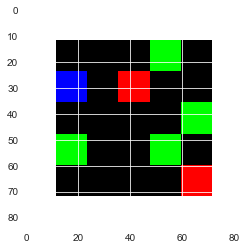

In [310]:
#========= 게임 환경 로딩 =========#
env = gameEnv(partial=False,size=5)

In [314]:
for item in env.objects:
    print(item.name, (item.x, item.y))

hero (0, 1)
goal (3, 3)
fire (2, 1)
goal (0, 3)
fire (4, 4)
goal (3, 0)
goal (4, 2)


In [316]:
#========= 신경망 학습 =========#

#모든 학습 파라미터를 설정한다            
batch_size = 32 #각 학습 단계에서 사용할 경험의 수
update_freq = 4 #학습 단계 기준의 업데이트 주기 
y = .99 #타겟 Q-값에 대한 할인 계수
startE = 1 #시작 시 랜덤 액션의 가능성
endE = 0.1 #종료 시 랜덤 액션의 가능성
anneling_steps = 10000. #startE에서 endE로 줄어드는데 필요한 학습 단계 수
num_episodes = 10000 #네트워크를 학습시키기 위한 게임 환경 에피소드의 수
pre_train_steps = 10000 #학습 시작 전 랜덤 액션의 단계 수
max_epLength = 50 #허용되는 최대 에피소드 길이
load_model = False #저장된 모델을 로딩할 지 여부
path = "./dqn" #모델을 저장할 경로
h_size = 512 #어드밴티지 스트림과 값 스트림으로 분리되기 전의 마지막 컨벌루션 레이어의 크기
tau = 0.001 #타겟 네트워크를 제1네트워크로 업데이트시켜 가는 비율

#### Tensorboard Test

In [378]:
import tensorflow as tf
tf.reset_default_graph()

In [352]:
X = tf.random_uniform([200, 1,1,512])
Y = tf.split(X, 2, 3)
Y_shape = tf.shape(Y[1])
sess = tf.Session()
X_v, Y_v, Y_shape_v = sess.run([X, Y, Y_shape])
sess.close()

In [356]:
X_v.shape

(200, 1, 1, 512)

In [361]:
Y_v[0].shape, Y_v[1].shape

((200, 1, 1, 256), (200, 1, 1, 256))

In [367]:
B, H, W, C = 5, 224, 224, 3
data = np.random.randn(B, H, W, C).astype(np.float32)
mask = np.random.randint(2, size=(B, H, W, C)).astype(np.float32)
data.shape, mask.shape

((5, 224, 224, 3), (5, 224, 224, 3))

In [374]:
(data * mask).sum(axis=(1,2,3), keepdims=True).shape

(5, 1, 1, 1)

In [380]:
# #최종 Q-값을 얻기 위해 어드밴티지 스트림과 값 스트림을 조합해 준다. 
# Qout = Value + tf.subtract(Advantage,
#                            tf.reduce_mean(Advantage, axis=1,
#                                           keep_dims=True)
#                           )
# predict = tf.argmax(Qout, 1)

#타겟 Q 값과 예측 Q 값 간의 제곱합 차를 취함으로써 비용을 구한다.
targetQ = tf.placeholder(shape=[None],dtype=tf.float32)
actions = tf.placeholder(shape=[None],dtype=tf.int32)
actions_onehot = tf.one_hot(actions, 4, # indices : A Tensor of indices
                            dtype=tf.float32) # depth : A scalar defining the depth of the one hot dimention

# Q = tf.reduce_sum(tf.multiply(Qout, actions_onehot), axis=1)

# td_error = tf.square(targetQ - Q)
# loss = tf.reduce_mean(td_error)
# trainer = tf.train.AdamOptimizer(learning_rate=0.0001)
# updateModel = trainer.minimize(loss)

sess = tf.Session()
t1, t2 = sess.run([actions_onehot, actions], feed_dict={actions:[1,3,4,3,2,2,3]})

In [382]:
t1, t2

(array([[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]], dtype=float32), array([1, 3, 4, 3, 2, 2, 3]))

In [390]:
q1 = np.array([.7, .3, .2, .4])
onehot_vec = np.array(
    [[0,0,0,1],
     [0,0,0,0],
     [0,1,0,0],
     [1,0,0,0]]
)
print(q1 * onehot_vec)
np.sum(q1 * onehot_vec, axis=1)

[[0.  0.  0.  0.4]
 [0.  0.  0.  0. ]
 [0.  0.3 0.  0. ]
 [0.7 0.  0.  0. ]]


array([0.4, 0. , 0.3, 0.7])

In [336]:
# 저수준의 tensorflow API를 간편하게 사용할 수 있는 고수준 경량 API
# https://www.popit.kr/tf-slim-%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0/
import tensorflow.contrib.slim as slim
#네트워크는 게임으로부터 하나의 프레임을 받아 이를 배열로 만든다 (flattening).
#배열의 크기를 재조절해주고 4개의 컨벌루션 레이어를 거치면서 처리해 준다.
scalarInput =  tf.placeholder(shape=[None,84*84*3],dtype=tf.float32)
imageIn = tf.reshape(scalarInput,shape=[-1,84,84,3])
conv1 = slim.conv2d(inputs=imageIn, num_outputs=32, kernel_size=[8,8],
                    stride=[4,4],padding='VALID', 
                    biases_initializer=None)
conv2 = slim.conv2d(inputs=conv1, num_outputs=64, kernel_size=[4,4],
                    stride=[2,2],padding='VALID', 
                    biases_initializer=None)
conv3 = slim.conv2d(inputs=conv2, num_outputs=64, kernel_size=[3,3],
                    stride=[1,1],padding='VALID', 
                    biases_initializer=None)
conv4 = slim.conv2d(inputs=conv3, num_outputs=h_size, kernel_size=[7,7],
                    stride=[1,1],padding='VALID', 
                    biases_initializer=None)

# 마지막 컨벌루션 레이어로부터의 출력값을 취한 후, 
# 이를 어드밴티지 스트림과 값 스트림으로 분리한다. 
streamAC, streamVC = tf.split(conv4, 2, 3) # value, num_or_size_splits, axis
                                           # 1*1*512 -> [1*1*256, 1*1*256]
streamA = slim.flatten(streamAC) # 256
streamV = slim.flatten(streamVC) # 256
AW = tf.Variable(tf.random_normal([h_size//2, env.actions])) # 256*6
VW = tf.Variable(tf.random_normal([h_size//2,1])) # 256*1
Advantage = tf.matmul(streamA, AW)
Value = tf.matmul(streamV, VW)

#최종 Q-값을 얻기 위해 어드밴티지 스트림과 값 스트림을 조합해 준다. 
Qout = Value + tf.subtract(Advantage,
                           tf.reduce_mean(Advantage, axis=1,
                                          keep_dims=True)
                          )
predict = tf.argmax(Qout, 1)

#타겟 Q 값과 예측 Q 값 간의 제곱합 차를 취함으로써 비용을 구한다.
targetQ = tf.placeholder(shape=[None],dtype=tf.float32)
actions = tf.placeholder(shape=[None],dtype=tf.int32)
actions_onehot = tf.one_hot(actions, env.actions, # indices : A Tensor of indices
                            dtype=tf.float32) # depth : A scalar defining the depth of the one hot dimention

Q = tf.reduce_sum(tf.multiply(Qout, actions_onehot), axis=1)

td_error = tf.square(targetQ - Q)
loss = tf.reduce_mean(td_error)
trainer = tf.train.AdamOptimizer(learning_rate=0.0001)
updateModel = trainer.minimize(loss)

In [337]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./tensordata/logs', sess.graph)

In [317]:
#========= 네트워크 구현 =========#
class Qnetwork():
    def __init__(self,h_size):
        #네트워크는 게임으로부터 하나의 프레임을 받아 이를 배열로 만든다 (flattening).
        #배열의 크기를 재조절해주고 4개의 컨벌루션 레이어를 거치면서 처리해 준다.
        self.scalarInput =  tf.placeholder(shape=[None,84*84*3],dtype=tf.float32)
        self.imageIn = tf.reshape(self.scalarInput,shape=[-1,84,84,3])
        self.conv1 = slim.conv2d( \
            inputs=self.imageIn,num_outputs=32,kernel_size=[8,8],stride=[4,4],padding='VALID', biases_initializer=None)
        self.conv2 = slim.conv2d( \
            inputs=self.conv1,num_outputs=64,kernel_size=[4,4],stride=[2,2],padding='VALID', biases_initializer=None)
        self.conv3 = slim.conv2d( \
            inputs=self.conv2,num_outputs=64,kernel_size=[3,3],stride=[1,1],padding='VALID', biases_initializer=None)
        self.conv4 = slim.conv2d( \
            inputs=self.conv3,num_outputs=h_size,kernel_size=[7,7],stride=[1,1],padding='VALID', biases_initializer=None)
        
        #마지막 컨벌루션 레이어로부터의 출력값을 취한 후, 이를 어드밴티지 스트림과 값 스트림으로 분리한다. 
        self.streamAC,self.streamVC = tf.split(self.conv4,2,3)
        self.streamA = slim.flatten(self.streamAC)
        self.streamV = slim.flatten(self.streamVC)
        self.AW = tf.Variable(tf.random_normal([h_size//2,env.actions]))
        self.VW = tf.Variable(tf.random_normal([h_size//2,1]))
        self.Advantage = tf.matmul(self.streamA,self.AW)
        self.Value = tf.matmul(self.streamV,self.VW)
        
        #최종 Q-값을 얻기 위해 어드밴티지 스트림과 값 스트림을 조합해 준다. 
        self.Qout = self.Value + tf.subtract(self.Advantage,tf.reduce_mean(self.Advantage,axis=1,keep_dims=True))
        self.predict = tf.argmax(self.Qout,1)
        
        #타겟 Q 값과 예측 Q 값 간의 제곱합 차를 취함으로써 비용을 구한다.
        self.targetQ = tf.placeholder(shape=[None],dtype=tf.float32)
        self.actions = tf.placeholder(shape=[None],dtype=tf.int32)
        self.actions_onehot = tf.one_hot(self.actions,env.actions,dtype=tf.float32)
        
        self.Q = tf.reduce_sum(tf.multiply(self.Qout, self.actions_onehot), axis=1)
        
        self.td_error = tf.square(self.targetQ - self.Q)
        self.loss = tf.reduce_mean(self.td_error)
        self.trainer = tf.train.AdamOptimizer(learning_rate=0.0001)
        self.updateModel = self.trainer.minimize(self.loss)

In [393]:
tf.reset_default_graph()
mainQN = Qnetwork(h_size)
targetQN = Qnetwork(h_size)

- Replay Buffer

In [419]:
buffer = [5,3,2,2,2,2,1,1,1,3,4,3]; buffer_size = 20
print(len(buffer))
experience = [5,5,5,5,5]
experience1 = [0,1,2,3,6,7,8,1,3,4,5,6,7,1,3]
cond = len(buffer) + len(experience) >= buffer_size
print('cond :', cond)
if cond:
    buffer[:(len(experience)+len(buffer)-buffer_size)]
buffer.extend(experience)
print(len(buffer))
cond = len(buffer) + len(experience1) >= buffer_size
print('cond :', cond)
if cond:
    buffer[0:(len(experience1)+len(buffer)-buffer_size)] = []
buffer.extend(experience1)
print(len(buffer))

12
cond : False
17
cond : True
20


In [431]:
np.array(random.sample([5,3,4,4,4,3,2,2,2], 5))

array([4, 2, 3, 5, 2])

In [432]:
#========= 경험 재생 =========#
# 다음 클래스는 경험과 샘플을 저장하고 랜덤하게 신경망을 학습시킨다 
        
class experience_buffer():
    def __init__(self, buffer_size = 50000):
        self.buffer = []
        self.buffer_size = buffer_size
    
    def add(self,experience):
        if len(self.buffer) + len(experience) >= self.buffer_size:
            self.buffer[0:(len(experience)+len(self.buffer))-self.buffer_size] = []
        self.buffer.extend(experience)
            
    def sample(self,size):
        return np.reshape(
            np.array(
                random.sample(self.buffer,
                              size)
            ),
            [size, 5])

In [455]:
#다음은 게임의 프레임의 사이즈를 조절해 주는 간단한 함수이다.
def processState(states):
    return np.reshape(states,[84*84*3])

In [458]:
#아래 함수들은 1차 신경망의 파라미터와 함께 목표 신경망의 파라미터를 업데이트하게 해준다
def updateTargetGraph(tfVars,tau):
    total_vars = len(tfVars)
    op_holder = []
    for idx,var in enumerate(tfVars[0:total_vars//2]):
        op_holder.append(tfVars[idx+total_vars//2].assign((var.value()*tau) + ((1-tau)*tfVars[idx+total_vars//2].value())))
    return op_holder

def updateTarget(op_holder,sess):
    for op in op_holder:
        sess.run(op)

- main.py

In [456]:
#========= 신경망 학습 =========#

#모든 학습 파라미터를 설정한다            
batch_size = 32 #각 학습 단계에서 사용할 경험의 수
update_freq = 4 #학습 단계 기준의 업데이트 주기 
y = .99 #타겟 Q-값에 대한 할인 계수
startE = 1 #시작 시 랜덤 액션의 가능성
endE = 0.1 #종료 시 랜덤 액션의 가능성
anneling_steps = 10000. #startE에서 endE로 줄어드는데 필요한 학습 단계 수
num_episodes = 10000 #네트워크를 학습시키기 위한 게임 환경 에피소드의 수
pre_train_steps = 10000 #학습 시작 전 랜덤 액션의 단계 수
max_epLength = 50 #허용되는 최대 에피소드 길이
load_model = False #저장된 모델을 로딩할 지 여부
path = "./dqn" #모델을 저장할 경로
h_size = 512 #어드밴티지 스트림과 값 스트림으로 분리되기 전의 마지막 컨벌루션 레이어의 크기
tau = 0.001 #타겟 네트워크를 제1네트워크로 업데이트시켜 가는 비율

In [459]:
tf.reset_default_graph()
mainQN = Qnetwork(h_size)
targetQN = Qnetwork(h_size)

init = tf.global_variables_initializer()

saver = tf.train.Saver()

trainables = tf.trainable_variables()

targetOps = updateTargetGraph(trainables, tau)

myBuffer = experience_buffer()

In [501]:
trainables[:6], trainables[6:]

([<tf.Variable 'Conv/weights:0' shape=(8, 8, 3, 32) dtype=float32_ref>,
  <tf.Variable 'Conv_1/weights:0' shape=(4, 4, 32, 64) dtype=float32_ref>,
  <tf.Variable 'Conv_2/weights:0' shape=(3, 3, 64, 64) dtype=float32_ref>,
  <tf.Variable 'Conv_3/weights:0' shape=(7, 7, 64, 512) dtype=float32_ref>,
  <tf.Variable 'Variable:0' shape=(256, 4) dtype=float32_ref>,
  <tf.Variable 'Variable_1:0' shape=(256, 1) dtype=float32_ref>],
 [<tf.Variable 'Conv_4/weights:0' shape=(8, 8, 3, 32) dtype=float32_ref>,
  <tf.Variable 'Conv_5/weights:0' shape=(4, 4, 32, 64) dtype=float32_ref>,
  <tf.Variable 'Conv_6/weights:0' shape=(3, 3, 64, 64) dtype=float32_ref>,
  <tf.Variable 'Conv_7/weights:0' shape=(7, 7, 64, 512) dtype=float32_ref>,
  <tf.Variable 'Variable_2:0' shape=(256, 4) dtype=float32_ref>,
  <tf.Variable 'Variable_3:0' shape=(256, 1) dtype=float32_ref>])

In [479]:
for ix, var in enumerate(trainables):
    print(var.value())

Tensor("Conv/weights/read:0", shape=(8, 8, 3, 32), dtype=float32)
Tensor("Conv_1/weights/read:0", shape=(4, 4, 32, 64), dtype=float32)
Tensor("Conv_2/weights/read:0", shape=(3, 3, 64, 64), dtype=float32)
Tensor("Conv_3/weights/read:0", shape=(7, 7, 64, 512), dtype=float32)
Tensor("Variable/read:0", shape=(256, 4), dtype=float32)
Tensor("Variable_1/read:0", shape=(256, 1), dtype=float32)
Tensor("Conv_4/weights/read:0", shape=(8, 8, 3, 32), dtype=float32)
Tensor("Conv_5/weights/read:0", shape=(4, 4, 32, 64), dtype=float32)
Tensor("Conv_6/weights/read:0", shape=(3, 3, 64, 64), dtype=float32)
Tensor("Conv_7/weights/read:0", shape=(7, 7, 64, 512), dtype=float32)
Tensor("Variable_2/read:0", shape=(256, 4), dtype=float32)
Tensor("Variable_3/read:0", shape=(256, 1), dtype=float32)


In [507]:
for ix, var in enumerate(trainables[0:12//2]):
    print()
    print(ix, ix+12//2)
    print(trainables[ix + 12//2])
    print(tau * var.value() + (1-tau)*trainables[ix + 12//2].value())


0 6
<tf.Variable 'Conv_4/weights:0' shape=(8, 8, 3, 32) dtype=float32_ref>
Tensor("add_45:0", shape=(8, 8, 3, 32), dtype=float32)

1 7
<tf.Variable 'Conv_5/weights:0' shape=(4, 4, 32, 64) dtype=float32_ref>
Tensor("add_46:0", shape=(4, 4, 32, 64), dtype=float32)

2 8
<tf.Variable 'Conv_6/weights:0' shape=(3, 3, 64, 64) dtype=float32_ref>
Tensor("add_47:0", shape=(3, 3, 64, 64), dtype=float32)

3 9
<tf.Variable 'Conv_7/weights:0' shape=(7, 7, 64, 512) dtype=float32_ref>
Tensor("add_48:0", shape=(7, 7, 64, 512), dtype=float32)

4 10
<tf.Variable 'Variable_2:0' shape=(256, 4) dtype=float32_ref>
Tensor("add_49:0", shape=(256, 4), dtype=float32)

5 11
<tf.Variable 'Variable_3:0' shape=(256, 1) dtype=float32_ref>
Tensor("add_50:0", shape=(256, 1), dtype=float32)


In [509]:
num_episodes, max_epLength

(10000, 50)

In [510]:
np.random.randint(0,4)

1

In [516]:
4 % 4

0

In [517]:
num_episodes

10000

In [ ]:
#랜덤 액션이 감소하는 비율을 설정 
e = startE # 1
stepDrop = (startE - endE)/anneling_steps # (1 - 0.1) / 10000.

#전체 보상과 에피소드 별 단계 수를 저장할 리스트를 생성
jList = []
rList = []
total_steps = 0

#모델이 저장될 경로 생성
if not os.path.exists(path):
    os.makedirs(path)

with tf.Session() as sess:
    sess.run(init)
    if load_model == True:
        print('Loading Model...')
        ckpt = tf.train.get_checkpoint_state(path)
        saver.restore(sess,ckpt.model_checkpoint_path)
    updateTarget(targetOps, sess) #타겟 네트워크가 제1네트워크와 동일하도록 설정
    for i in range(num_episodes): # num_episodes
        episodeBuffer = experience_buffer()
        #환경을 리셋하고 첫번째 관찰 얻기
        s = env.reset()
        s = processState(s) # 84*84*3=21168
        d = False
        rAll = 0
        j = 0
        #Q-네트워크
        while j < max_epLength: #만약 에이전트가 블록에 도달하기 위해 200회 이상 시도하면 종료
            j+=1
            # Q-네트워크로부터 (e의 확률로 랜덤한 액션과 함께) 그리디하게 액션을 선택한다.
            if np.random.rand(1) < e or total_steps < pre_train_steps:
                a = np.random.randint(0,4)
            else:
                a = sess.run(mainQN.predict,
                             feed_dict={mainQN.scalarInput:[s]})[0]
            # gameEnv.step()
            # penalty = gameEnv.moveChar(action=a)
                # 주어진 행동으로 hero를 움직이는 함수
                # always 0.
            # reward, done = self.checkGoal()
                # hero vs others
                # hero와 others의 좌표를 비교,
                    # 같을 경우 그 객체를 제거하고
                    # goal에 갔을 경우 새로운 goal을 생성,
                    # fire에 갔을 경우 새로운 fire을 생성
                    # 그 reward와 False를 반환
                # 같지 않을 경우, return 0.0, False (always)
            # state = self.renderEnv()
                # 현재 좌표상태를 계산 및 반환
                # 84*84*3으로~
            s1,r,d = env.step(a) # state, reward, False
            s1 = processState(s1) # 84*84*3으로 만들어줌
            total_steps += 1
            # 에피소드 버퍼에 경험을 저장
            # state, action, reward, state2, False
            episodeBuffer.add(np.reshape(np.array([s,a,r,s1,d]),[1,5])) 
            
            if total_steps > pre_train_steps: # pre_train_steps
                if e > endE:
                    e -= stepDrop
                
                if total_steps % (update_freq) == 0: # update_freq = 4
                                                     # C step?
                    trainBatch = myBuffer.sample(batch_size) # 경험에서 특정 부분을 랜덤하게 획득
                                                             # batch_size = 32
                                                             # (32, 5)
                    #타겟 Q-값에 대해 double DQN 업데이트를 수행
                    Q1 = sess.run(mainQN.predict,
                                  feed_dict={
                                      mainQN.scalarInput:np.vstack(trainBatch[:,3]) # new state
                                  })
                    Q2 = sess.run(targetQN.Qout,
                                  feed_dict={
                                      targetQN.scalarInput:np.vstack(trainBatch[:,3]) # new state
                                  })
                    end_multiplier = -(trainBatch[:,4] - 1)
                    doubleQ = Q2[range(batch_size),Q1]
                    targetQ = trainBatch[:,2] + (y*doubleQ * end_multiplier)
                    #타겟 값을 이용해 네트워크를 업데이트
                    _ = sess.run(mainQN.updateModel, \
                        feed_dict={
                            mainQN.scalarInput : np.vstack(trainBatch[:,0]),
                            mainQN.targetQ : targetQ, 
                            mainQN.actions : trainBatch[:,1]})
                    
                    updateTarget(targetOps,sess) #타겟 네트워크가 제1네트워크와 동일하도록 설정
            rAll += r
            s = s1
            
            if d == True:

                break
        
        myBuffer.add(episodeBuffer.buffer)
        jList.append(j)
        rList.append(rAll)
        #정기적으로 모델 저장
        if i % 1000 == 0:
            saver.save(sess,path+'/model-'+str(i)+'.cptk')
            print("Saved Model")
        if len(rList) % 10 == 0:
            print(total_steps,np.mean(rList[-10:]), e)
    saver.save(sess,path+'/model-'+str(i)+'.cptk')
print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")

In [523]:
np.vstack(np.arange(30).reshape(-1,5)[:,3])

array([[ 3],
       [ 8],
       [13],
       [18],
       [23],
       [28]])

In [ ]:
#========= 신경망 학습 확인하기 =========#
#시간의 흐름에 따른 평균 보상`

rMat = np.resize(np.array(rList),[len(rList)//100,100])
rMean = np.average(rMat,1)
plt.plot(rMean)